# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import string
import csv
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Directory Declaration

In [2]:
main_dir = r'D:\ML Projects\intent\\'
data_dir = main_dir + 'classified_data.csv'

# Import Dataset

In [3]:
data_df = pd.read_csv(data_dir, encoding='ISO-8859-1', names = ['statement','intent'])

In [4]:
data_df.head()

,statement,intent
0,Need help pleese,commonQ.assist
1,Need help,commonQ.assist
2,I need some info,commonQ.assist
3,Will you help me?,commonQ.assist
4,What else can you do?,commonQ.assist


### Creation of new_data_df containing hindi statements and their corresponding intent

In [5]:
data = pd.read_csv(main_dir+'modified_data.csv',encoding='ISO-8859-1')
new_data_df = pd.DataFrame(columns = ['statement','intent'])
new_data_df['statement'] = data['Hinglish']
new_data_df['intent'] = data_df['intent']

In [6]:
new_data_df.head()

,statement,intent
0,plaiaisai madad kee zaroorat hai,commonQ.assist
1,madad chaahie,commonQ.assist
2,mujhe kuchh jaanakaaree chaahie,commonQ.assist
3,kya tum meree madad karoge?,commonQ.assist
4,aap aur kya kar sakate hain?,commonQ.assist


## Data Statistics

In [7]:
data_df['intent'].value_counts()

faq.application_process       203
contact.contact               136
faq.borrow_use                103
faq.biz_simpler                94
faq.borrow_limit               76
faq.biz_new                    68
faq.apply_register             62
faq.approval_time              62
faq.address_proof              59
faq.banking_option_missing     54
faq.biz_category_missing       40
faq.aadhaar_missing            35
commonQ.bot                    26
commonQ.assist                 20
commonQ.name                   18
faq.bad_service                14
commonQ.how                    12
commonQ.not_giving             11
commonQ.wait                    7
commonQ.query                   7
commonQ.just_details            6
Name: intent, dtype: int64

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 2 columns):
statement    1113 non-null object
intent       1113 non-null object
dtypes: object(2)
memory usage: 17.5+ KB


In [9]:
data_df.describe()

,statement,intent
count,1113,1113
unique,1107,21
top,How do I apply?,faq.application_process
freq,2,203


In [10]:
data_df.isnull().sum()

statement    0
intent       0
dtype: int64

# Data Preprocessing

## Removal of punctuation

In [11]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
punc = string.punctuation

In [13]:
def rem_punc(row):
    no_punc = [elem for elem in row if elem not in string.punctuation]
    row = ''.join(no_punc)
    return row

In [91]:
data_df['statement'] = data_df['statement'].apply(rem_punc)
new_data_df['statement'] = new_data_df['statement'].apply(rem_punc)

In [15]:
data_df.head()

,statement,intent
0,Need help pleese,commonQ.assist
1,Need help,commonQ.assist
2,I need some info,commonQ.assist
3,Will you help me,commonQ.assist
4,What else can you do,commonQ.assist


## Tokenizing

In [16]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hharshit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
data_df['statement'] = data_df['statement'].apply(lambda col: word_tokenize(col))

## Removal of Stopwords

In [18]:
Stopwords = stopwords.words('english')

#### I would advise against removal of stopwords as it substantially affects the accuracy. 

In [19]:
#data_df['statement'] = data_df['statement'].apply(lambda col: [word for word in col if word.lower() not in Stopwords])

In [20]:
data_df.head()

,statement,intent
0,"[Need, help, pleese]",commonQ.assist
1,"[Need, help]",commonQ.assist
2,"[I, need, some, info]",commonQ.assist
3,"[Will, you, help, me]",commonQ.assist
4,"[What, else, can, you, do]",commonQ.assist


In [21]:
data_df['statement'] = data_df['statement'].apply(lambda row: [word.lower() for word in row])

## Lemmatization

In [22]:
from nltk.corpus import words
from nltk.stem import WordNetLemmatizer

In [23]:
lemmatizer = WordNetLemmatizer()
data_df['statement'] = data_df['statement'].apply(lambda row:[lemmatizer.lemmatize(word) for word in row])

In [24]:
data_df.head(5)

,statement,intent
0,"[need, help, pleese]",commonQ.assist
1,"[need, help]",commonQ.assist
2,"[i, need, some, info]",commonQ.assist
3,"[will, you, help, me]",commonQ.assist
4,"[what, else, can, you, do]",commonQ.assist


## Stemming

In [25]:
from nltk.stem.porter import PorterStemmer

In [26]:
porter_stemmer = PorterStemmer()
data_df['statement'] = data_df['statement'].apply(lambda row:[porter_stemmer.stem(word) for word in row])

In [27]:
data_df.head()

,statement,intent
0,"[need, help, plees]",commonQ.assist
1,"[need, help]",commonQ.assist
2,"[i, need, some, info]",commonQ.assist
3,"[will, you, help, me]",commonQ.assist
4,"[what, els, can, you, do]",commonQ.assist


## Spell Correction

In [28]:
from textblob import TextBlob

In [29]:
data_df['statement'] = data_df['statement'].apply(lambda row:[str(TextBlob(word).correct()) for word in row])

In [30]:
data_df['statement'] = data_df['statement'].apply(lambda row: " ".join(row))

In [31]:
data_df.head()

,statement,intent
0,need help pleas,commonQ.assist
1,need help,commonQ.assist
2,i need some into,commonQ.assist
3,will you help me,commonQ.assist
4,what else can you do,commonQ.assist


### Concatenation of the data frames with english and hindi dataframes

In [92]:
# Concatenation was performed after spell check because spell check will alter the entire hindi words in dataframe
data_df = pd.concat([data_df,new_data_df],ignore_index=True)

# Feature Engineering

In this step raw text data will be transferred into feature vectors. I have implemented the following different methods in order to obtain relevant features from the dataset.

1. Count Vectors as features
2. TF-IDF as features<br>
    -> Word level <br>
    -> n-gram level <br>
    -> character level<br>
   

## Count Vectorizer

In [93]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [row[1] for row in data_df['statement'].iteritems()]

vect = CountVectorizer()
X = vect.fit_transform(corpus)

names = vect.get_feature_names()
vect_df = pd.DataFrame(X.todense(),columns = names)

In [94]:
vect_df.head()

,99,999,999999999,9999999999,aadhaar,aadhaarit,aaeedee,aage,aana,aane,...,ya,yadi,yah,yahaan,ye,year,yojana,you,your,zaroorat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [97]:
# Dropped columns with numerical values as they seemed pretty irrelevant
vect_df.drop(['99','999','999999999','9999999999'],axis=1,inplace=True)
vect_df.head()

,aadhaar,aadhaarit,aaeedee,aage,aana,aane,aap,aapaka,aapake,aapakee,...,ya,yadi,yah,yahaan,ye,year,yojana,you,your,zaroorat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
# Feature vector
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [37]:
X.toarray().shape

(2226, 945)

In [38]:
data_df['statement'] = data_df['statement'].apply(rem_punc)

## TF-IDF Vectors as features

### Word level tf-idf

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [row[1] for row in data_df['statement'].iteritems()]
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(corpus)

names = tfidf_vect.get_feature_names()
print(X_tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [100]:
tfidf_vect_df = pd.DataFrame(X_tfidf.todense(),columns = names)
tfidf_vect_df.drop(['99','999','999999999','9999999999'],axis=1,inplace=True)
tfidf_vect_df.head()

,aadhaar,aadhaarit,aaeedee,aage,aana,aane,aap,aapaka,aapake,aapakee,...,ya,yadi,yah,yahaan,ye,year,yojana,you,your,zaroorat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.403180,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.354305,0.0,0.0


### ngram level tf-idf

In [101]:
tfidf_vect_ngram = TfidfVectorizer(ngram_range=(2,2))
X_tfidf_ngram = tfidf_vect_ngram.fit_transform(corpus)

names = tfidf_vect_ngram.get_feature_names()
print(X_tfidf_ngram.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [102]:
tfidf_vect_ngram_df = pd.DataFrame(X_tfidf_ngram.todense(), columns=names)
#tfidf_vect_ngram_df.drop(['999999999 call'], axis=1,inplace=True)
tfidf_vect_ngram_df.head()

,99 99,99 999,99 par,999 ab,999999999 call,9999999999 now,aadhaar can,aadhaar card,aadhaar get,aadhaar here,...,your number,your office,your process,your self,your side,your simplerloan,your team,your toll,your toller,zaroorat hai
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Character level tf-idf

In [103]:
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', ngram_range=(2,3))
X_tfidf_vect_ngram_chars = tfidf_vect_ngram_chars.fit_transform(corpus)

names = tfidf_vect_ngram_chars.get_feature_names()
print(X_tfidf_vect_ngram_chars.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [104]:
tfidf_vect_chars_df = pd.DataFrame(X_tfidf_vect_ngram_chars.todense(),columns=names)
tfidf_vect_chars_df.drop([' 1', ' 1 ', ' 2', ' 2 ', ' 9', ' 99'],axis=1,inplace=True)
tfidf_vect_chars_df.head()

,a,a,aa,ab,ac,ad,af,ag,ai,al,...,y,yo,z,z k,z p,z s,za,zar,o,of
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
tfidf_vect_chars_df.columns

Index([' a', ' a ', ' aa', ' ab', ' ac', ' ad', ' af', ' ag', ' ai', ' al',
       ...
       'y', 'yo', 'z ', 'z k', 'z p', 'z s', 'za', 'zar', 'o', 'of'],
      dtype='object', length=2437)

# Model Building

In this step I have trained classifiers based on the features created in previous step. There are many choices of machine learning models that can be implemented. I have implemented the following models: <br>
1. Naive Bayes Classifier
2. Logistic Regression
3. Random Forest Classifier
4. XGBoost Gradient Classifier
5. Support Vector Machines(SVM)
6. Neural Networks


In [106]:
def train_model(classifier,X_train,y_train,X_test,y_test):
    
    classifier.fit(X_train,y_train)
    predictions = classifier.predict(X_test)
    return accuracy_score(predictions,y_test)

## Label Encoding

In [107]:
# label Encoding
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
lbl_enc = LabelEncoder()


vect_df['intent'] = data_df.apply(lbl_enc.fit_transform).iloc[:,-1]

tfidf_vect_df['intent'] = data_df.apply(lbl_enc.fit_transform).iloc[:,-1]

tfidf_vect_ngram_df['intent'] = data_df.apply(lbl_enc.fit_transform).iloc[:,-1]

tfidf_vect_chars_df['intent'] = data_df.apply(lbl_enc.fit_transform).iloc[:,-1]



## Train_Test Split

In [108]:
from sklearn.model_selection import train_test_split

def split_data(X_feature,y_feature):
    X = X_feature
    y = y_feature
    
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state=94)
    
    return X_train,X_test,y_train,y_test

## ML models

In [109]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import svm

In [110]:
# Classifier function dictionary
classifier_dict = {'NaiveBayes':GaussianNB(),'LogisticRegression':LogisticRegression(),'RandomForest':RandomForestClassifier(),
                  'SVM':svm.LinearSVC(),'xgb':XGBClassifier(max_depth=6,learning_rate=0.15)}

In [111]:
# This function takes model name as input and trains the model on different types of feature vectors including Count Vectors,
# word level tf-idf vectors, ngram level tf-idf vectors and character level tf-idf vectors
def classifier(model):
    Classifier = classifier_dict[model]

    # Classifier on Count Vectors
    X = vect_df.iloc[:,:-1]
    y = vect_df['intent']
    X_train,X_test,y_train,y_test = split_data(X,y)

    # List for storing accuracy values
    Accuracy = []

    accuracy = train_model(Classifier,X_train,y_train,X_test,y_test)
    Accuracy.append(accuracy)
    print(model,", Count Vectors: ",accuracy)

    # Classifier on Word level TF-IDF vectors
    X = tfidf_vect_df.iloc[:,:-1]
    y = tfidf_vect_df['intent']
    X_train,X_test,y_train,y_test = split_data(X,y)

    accuracy = train_model(Classifier,X_train,y_train,X_test,y_test)
    Accuracy.append(accuracy)
    print(model,", Word level TF-IDF Vectors: ",accuracy)

    # Classifier on N-gram level TF-IDF vectors
    X = tfidf_vect_ngram_df.iloc[:,:-1]
    y = tfidf_vect_ngram_df['intent']
    X_train,X_test,y_train,y_test = split_data(X,y)

    accuracy = train_model(Classifier,X_train,y_train,X_test,y_test)
    Accuracy.append(accuracy)
    print(model,", n-gram level TF-IDF Vectors: ",accuracy)

    # Classifier on character level TF-IDF vectors
    X = tfidf_vect_chars_df.iloc[:,:-1]
    y = tfidf_vect_chars_df['intent']
    X_train,X_test,y_train,y_test = split_data(X,y)

    accuracy = train_model(Classifier,X_train,y_train,X_test,y_test)
    Accuracy.append(accuracy)
    print(model,", character level TF-IDF Vectors: ",accuracy)
    return Accuracy



### Naive Bayes Classifier

In [112]:
# nb stores the accuracy list of naive bayes classifier returned from classifier function.
nb = classifier('NaiveBayes')

NaiveBayes , Count Vectors:  0.8910179640718563
NaiveBayes , Word level TF-IDF Vectors:  0.8874251497005988
NaiveBayes , n-gram level TF-IDF Vectors:  0.9221556886227545
NaiveBayes , character level TF-IDF Vectors:  0.9017964071856287


### Logistic Regression

In [113]:
# lr stores the accuracy list of naive bayes classifier returned from classifier function.
lr = classifier('LogisticRegression')

LogisticRegression , Count Vectors:  0.9365269461077844
LogisticRegression , Word level TF-IDF Vectors:  0.8778443113772455
LogisticRegression , n-gram level TF-IDF Vectors:  0.7916167664670659
LogisticRegression , character level TF-IDF Vectors:  0.8826347305389222


### Random Forest Classifier

In [114]:
# rf stores the accuracy list of naive bayes classifier returned from classifier function.
rf = classifier('RandomForest')

RandomForest , Count Vectors:  0.9089820359281438
RandomForest , Word level TF-IDF Vectors:  0.9161676646706587
RandomForest , n-gram level TF-IDF Vectors:  0.8467065868263473
RandomForest , character level TF-IDF Vectors:  0.9137724550898204


### XGBoost Gradient Classifier

In [115]:
# xgb stores the accuracy list of naive bayes classifier returned from classifier function.
xgb = classifier('xgb')

C:\Users\hharshit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


xgb , Count Vectors:  0.9173652694610779


C:\Users\hharshit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


xgb , Word level TF-IDF Vectors:  0.9101796407185628


C:\Users\hharshit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


xgb , n-gram level TF-IDF Vectors:  0.7820359281437126
xgb , character level TF-IDF Vectors:  0.9389221556886228


C:\Users\hharshit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Support Vector Machines

In [116]:
# svm stores the accuracy list of naive bayes classifier returned from classifier function.
SVM = classifier('SVM')

SVM , Count Vectors:  0.9520958083832335
SVM , Word level TF-IDF Vectors:  0.9532934131736527
SVM , n-gram level TF-IDF Vectors:  0.925748502994012
SVM , character level TF-IDF Vectors:  0.9520958083832335


## Plot of Accuracy across different models

In [117]:
nbAcc = np.array(nb)
logAcc = np.array(lr)
rfAcc = np.array(rf)
xgbAcc = np.array(xgb)
svmAcc = np.array(SVM)

In [118]:
accuracy_arr = np.vstack([nbAcc,logAcc,rfAcc,xgbAcc,svmAcc]).T

In [119]:
accuracy_arr

array([[0.89101796, 0.93652695, 0.90898204, 0.91736527, 0.95209581],
       [0.88742515, 0.87784431, 0.91616766, 0.91017964, 0.95329341],
       [0.92215569, 0.79161677, 0.84670659, 0.78203593, 0.9257485 ],
       [0.90179641, 0.88263473, 0.91377246, 0.93892216, 0.95209581]])

In [120]:
acc_df = pd.DataFrame(accuracy_arr,columns = ['NaiveBayes','logisticRegression','RandomForest','XGBoost','SVM'],
                      index = ['Count Vectors','Word tf-idf','ngram tf-idf','character tf-idf'])

In [121]:
acc_df

,NaiveBayes,logisticRegression,RandomForest,XGBoost,SVM
Count Vectors,0.891018,0.936527,0.908982,0.917365,0.952096
Word tf-idf,0.887425,0.877844,0.916168,0.910180,0.953293
ngram tf-idf,0.922156,0.791617,0.846707,0.782036,0.925749
character tf-idf,0.901796,0.882635,0.913772,0.938922,0.952096


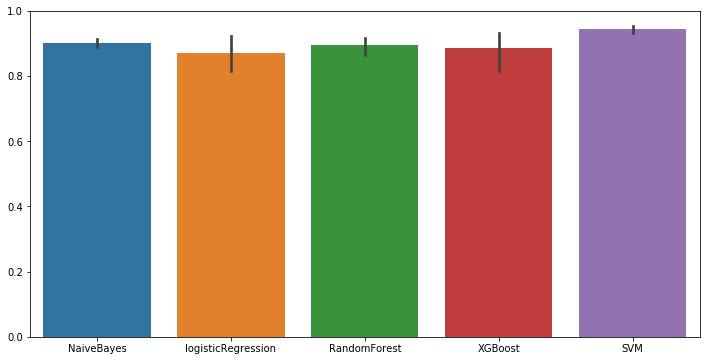

In [122]:
plt.figure(figsize=(12,6))
sns.barplot(data = acc_df)
plt.savefig('accuracy.jpg')

## Neural Networks

In [131]:
import tensorflow as tf

X = vect_df.iloc[:,:-1]
y = vect_df['intent']
X_train,X_test,y_train,y_test = split_data(X,y)

X_train.columns = [col.strip() for col in X_train.columns]

feat_cols = []
for col in X_train.columns:
    feat_cols.append(tf.feature_column.numeric_column(col))

input_func = tf.estimator.inputs.pandas_input_fn(x = X_train, y=y_train,batch_size=10,num_epochs=5,shuffle=True)
classifier = tf.estimator.DNNClassifier(hidden_units=[1024,512,256],n_classes=21,feature_columns=feat_cols)

classifier.train(input_fn = input_func, steps=600)

pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)
predictions = list(classifier.predict(input_fn=pred_fn))


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\hharshit\\AppData\\Local\\Temp\\tmpkldde9z6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001D41279D390>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Che

In [132]:
final_preds = []

for pred in predictions:
    final_preds.append(pred['class_ids'][0])

print(classification_report(y_test,final_preds))

             precision    recall  f1-score   support

          0       0.77      1.00      0.87        10
          1       0.84      0.73      0.78        22
          2       0.67      0.86      0.75         7
          3       0.83      1.00      0.91         5
          4       0.53      0.73      0.62        11
          5       0.69      1.00      0.82         9
          6       1.00      0.67      0.80         9
          7       0.00      0.00      0.00         8
          8       0.94      0.92      0.93       113
          9       1.00      1.00      1.00        27
         10       1.00      1.00      1.00        35
         11       0.99      0.95      0.97       153
         12       0.90      0.94      0.92        47
         13       0.92      0.96      0.94        47
         14       0.85      0.79      0.81        14
         15       0.97      1.00      0.99        37
         16       1.00      1.00      1.00        30
         17       0.98      0.93      0.95   

**As it can be seen that neural networks are performing at comparable accuracy to other machine learning models. The reason being less amount of data. **

## K-fold cross validation of SVM

In [145]:
X = vect_df.iloc[:,:-1]
y = vect_df['intent']
X_train,X_test,y_train,y_test = split_data(X,y)

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

kfold = KFold(n_splits=10,shuffle=True)
acc = np.array([])
for train_idx,test_idx in kfold.split(X_train,y_train):
    X_train_cv,y_train_cv = X_train.iloc[train_idx], y_train.iloc[train_idx]
    X_test_cv, y_test_cv = X_train.iloc[test_idx], y_train.iloc[test_idx]
    
    clf = svm.LinearSVC()
    clf.fit(X_train_cv, y_train_cv)
    predictions = clf.predict(X_test_cv)
    
    acc = np.append(acc, accuracy_score(y_test_cv,predictions))
print(acc)
print("Accuracy score: %0.2f +/- %0.2f" %(acc.mean(),acc.std()))


[0.96414343 0.93227092 0.93227092 0.95219124 0.964      0.956
 0.952      0.976      0.94       0.924     ]
Accuracy score: 0.95 +/- 0.02


## Stratified K-Fold cross validation for SVM

In [146]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10,shuffle=True)
acc = np.array([])
for train_idx,test_idx in skf.split(X_train,y_train):
    X_train_cv,y_train_cv = X_train.iloc[train_idx], y_train.iloc[train_idx]
    X_test_cv, y_test_cv = X_train.iloc[test_idx], y_train.iloc[test_idx]
    
    clf = svm.LinearSVC()
    clf.fit(X_train_cv, y_train_cv)
    predictions = clf.predict(X_test_cv)
    
    acc = np.append(acc, accuracy_score(y_test_cv,predictions))
print(acc)
print("Accuracy score: %0.2f +/- %0.2f" %(acc.mean(),acc.std()))


[0.95366795 0.94208494 0.95703125 0.96837945 0.95219124 0.96787149
 0.92307692 0.97154472 0.95901639 0.975     ]
Accuracy score: 0.96 +/- 0.01


**As it can be seen from the cross validation scores of both the methods that there are high chances that model is free of bias and variance**

## Saving the model : Serialization and Deserialization

In [133]:
acc_df

,NaiveBayes,logisticRegression,RandomForest,XGBoost,SVM
Count Vectors,0.891018,0.936527,0.908982,0.917365,0.952096
Word tf-idf,0.887425,0.877844,0.916168,0.910180,0.953293
ngram tf-idf,0.922156,0.791617,0.846707,0.782036,0.925749
character tf-idf,0.901796,0.882635,0.913772,0.938922,0.952096


From the above dataframe we can see that **SVM** model with count vectors and character tf-idf feature vectors gives us maximum accuracy. So, I will save the **SVM** model with count vectors as feature vector by performing serialization or pickling

In [135]:
from sklearn.externals import joblib
from sklearn import svm

SVM = svm.LinearSVC()
X = vect_df.iloc[:,:-1]
y = vect_df['intent']
X_train,X_test,y_train,y_test = split_data(X,y)
SVM.fit(X_train,y_train)

# dumping of SVM model
joblib.dump(SVM,'SVM_hybrid.pkl')

['SVM_hybrid.pkl']

In [136]:
# This block of code creates a dictionary intent_dict so as to map the integer output of the classifier to actual intent values
keys = []
values = []
for i in tfidf_vect_df['intent'].value_counts().iteritems():
    keys.append(i[0])

for j in data_df['intent'].value_counts().iteritems():
    values.append(j[0])

intent_dict = dict((keys[i],values[i]) for i in range(len(keys)))

In [137]:
intent_dict

{11: 'faq.application_process',
 8: 'contact.contact',
 20: 'faq.borrow_use',
 18: 'faq.biz_simpler',
 19: 'faq.borrow_limit',
 17: 'faq.biz_new',
 13: 'faq.apply_register',
 12: 'faq.approval_time',
 10: 'faq.address_proof',
 15: 'faq.banking_option_missing',
 16: 'faq.biz_category_missing',
 9: 'faq.aadhaar_missing',
 1: 'commonQ.bot',
 0: 'commonQ.assist',
 4: 'commonQ.name',
 14: 'faq.bad_service',
 2: 'commonQ.how',
 5: 'commonQ.not_giving',
 7: 'commonQ.query',
 6: 'commonQ.wait',
 3: 'commonQ.just_details'}

## Function for predicting values by taking string inputs

In [138]:
def predict():
    print('Enter your statement: ')
    statement = input()
    #tokens = statement.split()
    #tokens = [str(TextBlob(word).correct()) for word in tokens]
    #statement = " ".join(tokens)
    
    vect = CountVectorizer(vocabulary= vect_df.iloc[:,:-1].columns)

    x = vect.fit_transform([statement])
    
    svmClassifier = joblib.load(r'D:\ML Projects\intent\SVM_hybrid.pkl')
    pred = svmClassifier.predict(x.toarray())
    print(intent_dict[pred[0]])

In [90]:
# These are just sample test cases to check the accuracy of model. 
i=0
while i<5:
    predict()
    i+=1

Enter your statement: 
kya aap meri madad kar skte hai
commonQ.assist
Enter your statement: 
loan k lie kaise apply karu
faq.application_process
Enter your statement: 
which type of loan is good for small business
faq.biz_simpler
Enter your statement: 
chote business k lie kis tarah ka loan accha hai
faq.biz_simpler
Enter your statement: 
kaise ho
commonQ.how
